# Cross-validation and polynomial regression

## Polynomial regression

Polynomial regression consists of fitting some data $(x, y)$ to a $n$-order polynomial of the form:

$$
 y = f(x) = b + w_1 \cdot x + w_2 \cdot x^2 + ... + w_n \cdot x^n
$$
 
By rewriting the unidimensional input $x$ into the following vector:

$$
 \mathbf{x} = \begin{bmatrix} x & x^2 & ... & x^n \end{bmatrix}^T
$$

and the weight vector as:

$$
 \mathbf{w} = \begin{bmatrix} w_1 & w_2 & ... & w_n \end{bmatrix}^T
$$
 
the problem can be reduced to linear regression:

$$
 y = \langle \mathbf{w} \cdot \mathbf{x} \rangle + b
$$
 
 and we can apply the delta learning rule to find $\mathbf{w}$ and $b$:

$$
 \Delta \mathbf{w} =  \eta \, (t_i - y_i ) \, \mathbf{x_i}
$$
$$
 \Delta b =  \eta \cdot (t_i - y_i ) 
$$

A first method to perform polynomial regression would be to adapt the code you wrote in the last exercise session for linear regression. However, you saw that properly setting the correct learning rate can be quite tricky. 

The solution retained for this exercise is to use the built-in functions of Numpy which can already perform polynomial regression in an optimized and proved-sure manner (Note: NumPy does not use gradient descent, but rather directly minimizes the error-function by inversing the Gram matrix).

```python
w = np.polyfit(X, t, deg)
```

This function takes the inputs $X$, the desired outputs $t$ and the desired degree of the polynomial `deg`, performs the polynomial regression and returns the adequate set of weights (beware: the higher-order coefficient comes first, the bias is last).

Once the weights are obtained, one can use them to predict the value of an example with the function:

```python
y = np.polyval(w, X)
```

*Note:* if you prefer to use scikit-learn, check <https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html> but see <https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2> for why it may be a bad idea.

Let's start by importing the usual stuff and create a dataset of 16 samples generated using the function $x \, \sin x$ plus some noise:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Just to avoid the annoying warnings, please ignore
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
 
def create_dataset(N, noise):
    "Creates a dataset of N points generated from x*sin(x) plus some noise."
    
    x = np.linspace(0, 10, 300)
    rng = np.random.default_rng()
    rng.shuffle(x)
    x = np.sort(x[:N])
    t = x * np.sin(x) + noise*rng.uniform(-1.0, 1.0, N)
    
    return x, t

N = 16
X, t = create_dataset(N, noise=0.2)

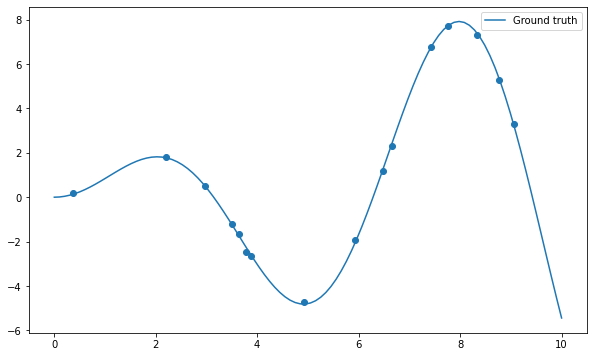

In [2]:
x = np.linspace(0, 10, 100)

plt.figure(figsize=(10, 6))
plt.plot(x, x*np.sin(x), label="Ground truth")
plt.scatter(X, t)
plt.legend()
plt.show()

**Q:** Apply the `np.polyfit()` function on the data and visualize the result for different degrees of the polynomial (from 1 to 20 or even more). What do you observe? Find a polynomial degree which clearly overfits.

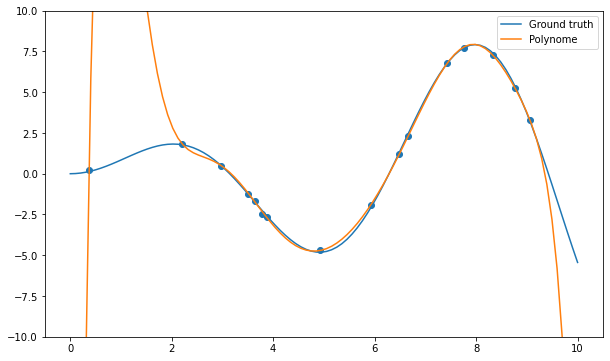

In [3]:
deg = 10

# Polynomial regression
w = np.polyfit(X, t, deg)

# Inference on the training set
y = np.polyval(w, x)

plt.figure(figsize=(10, 6))
plt.plot(x, x*np.sin(x), label="Ground truth")
plt.plot(x, y, label="Polynome")
plt.scatter(X, t)
plt.ylim((-10., 10.))
plt.legend()
plt.show()

**Q:** Plot the mean square error on the training set for all polynomial regressions from 1 to 20. How does the training error evolve when the degree of the polynomial is increased? What is the risk by taking the hypothesis with the smallest training error? 

Degree 1 : training error 8.187040276442204
Degree 2 : training error 5.5289864372995785
Degree 3 : training error 5.293731681138089
Degree 4 : training error 0.42018834988682535
Degree 5 : training error 0.21534675240940732
Degree 6 : training error 0.011266642665759866
Degree 7 : training error 0.005621761206495456
Degree 8 : training error 0.005276439458323331
Degree 9 : training error 0.005086235091732753
Degree 10 : training error 0.002344814786534759
Degree 11 : training error 0.00214102277751514
Degree 12 : training error 0.0020037196576680213
Degree 13 : training error 0.0019978403374869705
Degree 14 : training error 0.0019710169258506756
Degree 15 : training error 0.0019654736800885793
Degree 16 : training error 0.001960240645735451
Degree 17 : training error 4.9075584685464174e-08
Degree 18 : training error 8.672770108935966e-09
Degree 19 : training error 3.59815541466928e-09
Degree 20 : training error 2.0169089262112425e-09


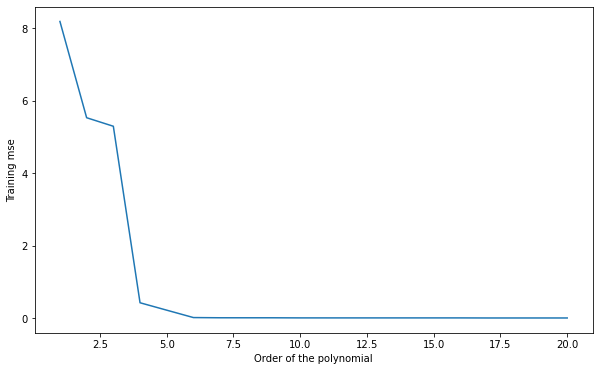

In [4]:
training_mse = []

degrees = range(1, 21)

for deg in degrees:
    
    w = np.polyfit(X, t, deg)
    y = np.polyval(w, X)
    
    mse = np.mean((t-y)**2)
    
    training_mse.append(mse)
    
    print("Degree", deg, ": training error", mse)
    
plt.figure(figsize=(10, 6))
plt.plot(degrees, training_mse)
plt.xlabel("Order of the polynomial")
plt.ylabel("Training mse")
plt.show()

**A:** the more complex the model, the smaller the training error.

## Simple hold-out cross-validation

You will now apply **simple hold-out cross-validation** to find the optimal degree for the polynomial regression. You will need to separate the data set into a training set $S_{\text{train}}$ (70% of the data) and a test set $S_{\text{test}}$ (the remaining 30%). 

The data (X, t) could be easily split into two sets of arrays using slices of indices, as the data is already randomized:

```python
N_train = int(0.7*N)
X_train, t_train = X[:N_train], t[:N_train]
X_test, t_test = X[N_train:], t[N_train:]
```

A much more generic approach is to use the library `scikit-learn` (<https://www.scikit-learn.org>), which provides a method able to split any dataset randomly. 

You can import the method `train_test_split()` from its module:

In [5]:
from sklearn.model_selection import train_test_split

The doc of the function is available at: <https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html>.

**Q:** Use scikit-learn to split the data into the corresponding training and test sets. Train each polynomial from degree 1 to 20 on $S_{\text{train}}$ and plot the generalization error on $S_{\text{test}}$. Which degree of the polynomial gives the minimal empirical error? Why? Run the cross-validation split multiple times. Do you always obtain the same optimal degree? 

Degree 1 : empirical error 7.63470557182139
Degree 2 : empirical error 10.265127032511506
Degree 3 : empirical error 9.999958374201407
Degree 4 : empirical error 0.6106165506239094
Degree 5 : empirical error 1.5915283985200879
Degree 6 : empirical error 0.06797419006509854
Degree 7 : empirical error 0.01747962296503381
Degree 8 : empirical error 0.20890090108676515
Degree 9 : empirical error 0.4306764049956294
Degree 10 : empirical error 128.35589366448895
Degree 11 : empirical error 251.1676456859405
Degree 12 : empirical error 491.0700722246121
Degree 13 : empirical error 950.1301508547825
Degree 14 : empirical error 1811.393547547265
Degree 15 : empirical error 3396.3065292455117
Degree 16 : empirical error 6257.772556404316
Degree 17 : empirical error 11327.584957798927
Degree 18 : empirical error 20144.888187814944
Degree 19 : empirical error 35202.620572303196
Degree 20 : empirical error 60461.915847918324


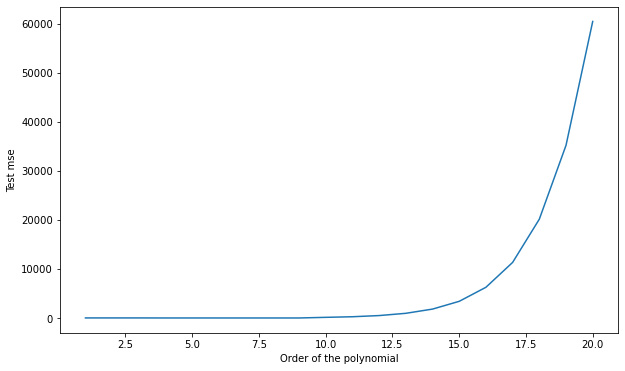

In [6]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)

degrees = range(1, 21)

test_mse = []

for deg in degrees:
    # Train on the training set
    w = np.polyfit(X_train, t_train, deg)
    
    # Test on the test set
    y_test = np.polyval(w, X_test)
    mse = np.mean((t_test-y_test)**2)
    test_mse.append(mse)
    
    print("Degree", deg, ": empirical error", mse)
    
plt.figure(figsize=(10, 6))
plt.plot(degrees, test_mse)
plt.xlabel("Order of the polynomial")
plt.ylabel("Test mse")
plt.show()

**A:** depending on the split, the optimal degree is around 6 or 7. This variability is because some samples of the test set might better fit with a given polynomial, depending on how the split was made.  

## k-fold cross-validation

As we only have 16 samples to learn from, it is quite annoying to "lose" 5 of them for the test set. Here we can afford to use **k-fold cross-validation**, where the cross-validation split is performed $k$ times:

* The dataset is split into $k$ subsets of equal size (if possible).
* Each subset is iteratively used as the test set, while the $k-1$ other ones are used as a training set.
* The final empirical error is the average of the mse on all subsets.

It would be possible to make the splits using indices too, but it is much easier to use `scikit-learn` once again. You can import the `KFold` class like this:

In [7]:
from sklearn.model_selection import KFold

k = 4
kf = KFold(n_splits=k, shuffle=True)

`n_splits` corresponds to $k$: how many times the dataset is split. We can take $k=4$ for example (4 subsets of 4 samples).

**Q:** Check the doc of `KFold` (<https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html>). Print the indices of the examples of the training and test sets for each iteration of the algorithm. Change the value of $k$ to understand how it works.

In [8]:
for train_index, test_index in kf.split(X, t):
    print("Train:", train_index)
    print("Test:", test_index)
    print('-------')

Train: [ 0  2  3  5  6  7  8  9 10 13 14 15]
Test: [ 1  4 11 12]
-------
Train: [ 1  2  3  4  5  6  7  9 11 12 13 15]
Test: [ 0  8 10 14]
-------
Train: [ 0  1  2  3  4  6  8 10 11 12 14 15]
Test: [ 5  7  9 13]
-------
Train: [ 0  1  4  5  7  8  9 10 11 12 13 14]
Test: [ 2  3  6 15]
-------


**Q:** Apply k-fold cross-validation on the polynomial regression problem. Which polynomial degree is the best? Run the split multiple times: does the best polynomial degree change?

1 17.58185055624048
2 22.744715894526905
3 850.0942771236222
4 52.2518502028411
5 1708.573549527795
6 5917.420689361812
7 7950.371720572904
8 250212.69868923555
9 14876301.542988822
10 2073826589.0981133
11 14419764356.17485
12 7938445472.883772
13 4625965552.406379
14 2838715496.320258
15 1830920266.3491213
16 1246980443.1627393
17 912911586.1019934
18 747149401.2687784
19 722831330.8521672
20 855049229.585683


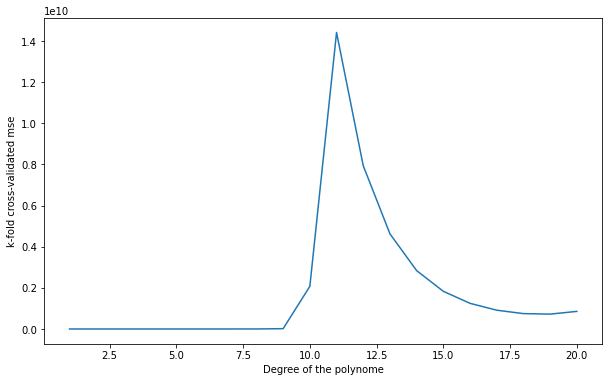

In [9]:
k = 4
kf = KFold(n_splits=k, shuffle=True)

degrees = range(1, 21)

test_mse = []

for train_index, test_index in kf.split(X, t):
    
    split_mse = []
    
    for deg in degrees:
        
        w = np.polyfit(X[train_index], t[train_index], deg)
        y = np.polyval(w, X[test_index])
        
        mse = np.mean((t[test_index] - y)**2)
        split_mse.append(mse)
    
    test_mse.append(split_mse)
        
test_mse = np.mean(test_mse, axis=0)

for deg, mse in zip(degrees, test_mse):
    print(deg, mse)

plt.figure(figsize=(10, 6))
plt.plot(degrees, test_mse)
plt.xlabel("Degree of the polynome")
plt.ylabel("k-fold cross-validated mse")
plt.show()

**A:** a polynomial of order between 6 and 7 still seems the best, but it varies from run to run (as well as on the data, you may observe something different).

**Q:** Change $k$ to $N$. How stable are the results between two runs?

1 10.901977760540776
2 8.957218036524338
3 65.67829631959829
4 30.85983212975335
5 143.81725694984942
6 30.94605135481495
7 7.211158066529226
8 668.5395672884442
9 40971.902860503295
10 22821.953046152186
11 763537.0653566807
12 2747177.8117017346
13 46986152.49092093
14 36935031.692825794
15 2347712884387.618
16 1335074922777.1252
17 793422201535.7719
18 490986093814.9613
19 315383103607.51624
20 209601669239.77136


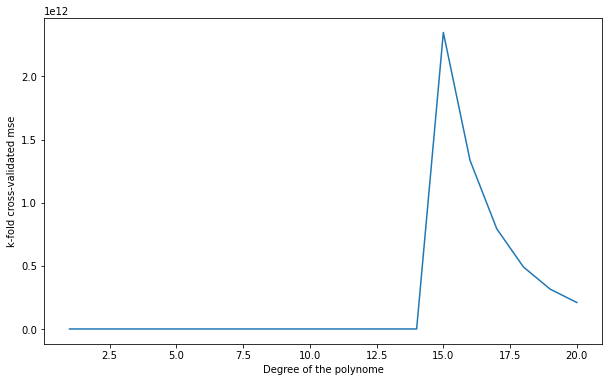

In [10]:
k = N
kf = KFold(n_splits=k, shuffle=True)

degrees = range(1, 21)

test_mse = []

for train_index, test_index in kf.split(X, t):
    
    split_mse = []
    
    for deg in degrees:
        
        w = np.polyfit(X[train_index], t[train_index], deg)
        y = np.polyval(w, X[test_index])
        
        mse = np.mean((t[test_index] - y)**2)
        split_mse.append(mse)
    
    test_mse.append(split_mse)
        
test_mse = np.mean(test_mse, axis=0)

for deg, mse in zip(degrees, test_mse):
    print(deg, mse)

plt.figure(figsize=(10, 6))
plt.plot(degrees, test_mse)
plt.xlabel("Degree of the polynome")
plt.ylabel("k-fold cross-validated mse")
plt.show()

**A:** With $k=N$ (one sample in the test set every time), the results are more stable. It is called **leave-one-out cross-validation** (LOOCV). It is the best cross-validation you can make in terms of bias (you use almost all your data to learn), but it is very expensive (you have to retrain your algorithm for each sample) and the empirical error has a high variance.

**Q:** Regenerate the data with a noise equal to 0.0 and re-run all experiments. What does it change?

**A:** Without noise, higher-order polynomials are a better fit. This is because the $x \, \sin x$ can be "naturally" approximated by polynomials (Taylor series).